In [1]:
# result comparison between deployments, encounters

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
result_path  = '/home/ys587/__Data/__whistle/__whistle_30_species/__fit_result_species/__final'

In [4]:
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
num_species = len(species_dict)
species_list = list(species_dict.keys())
species_id = list(species_dict.values())

In [5]:
## result folders


In [6]:
# split_type = 'deployment'
# split_type = 'encounter'
# split_type = 'clip'

# run 0 
split_type = 'deployment'
# target_split_folder = '20210614_202736_deployment_run0_mixup_spp'
# target_split_folder = '20210629_134916_deployment_run0_attention_lr_3p33e-5'
# target_split_folder = '20210701_010815_deployment_run0_B3_lr_1e-3'
target_split_folder = '20210706_112715_deployment_run0_resnet50'

# split_type = 'encounter'
# target_split_folder = '20210623_162002_encounter_run0_mixup_spp'
# target_split_folder = '20210702_165627_encounter_run0_attention'

# split_type = 'clip'
# target_split_folder = '20210623_162213_clip_run0_mixup_spp'
# target_split_folder = '20210702_205644_clip_run0_attention'
# target_split_folder = '/home/ys587/__Data/__whistle/__whistle_30_species/__fit_result_species/__final/20210702_205644_clip_run0_attention'


# Deployment split

              precision    recall  f1-score   support

          BD      0.105     0.079     0.090      2160
          CD      0.563     0.680     0.616      4715
         STR      0.346     0.352     0.349      2691
         SPT      0.406     0.202     0.270      2392
        SPIN      0.085     0.046     0.060      1123
         PLT      0.227     0.422     0.295      2164
          RT      0.546     0.290     0.379      1404
         FKW      0.673     0.677     0.675      3425

    accuracy                          0.423     20074
   macro avg      0.369     0.344     0.342     20074
weighted avg      0.421     0.423     0.410     20074

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[ 171  395  524  164  133  706   25   42]
 [ 299 3204  367  186   14  539   46   60]
 [ 278  761  947  209   88  335   25   48]
 [ 269  726  431  483  202  226   17   38]
 [ 273  232  223  103   52  166   35   39]
 [ 231  230  144   32   86  914   55  472]
 [  60  110   48 

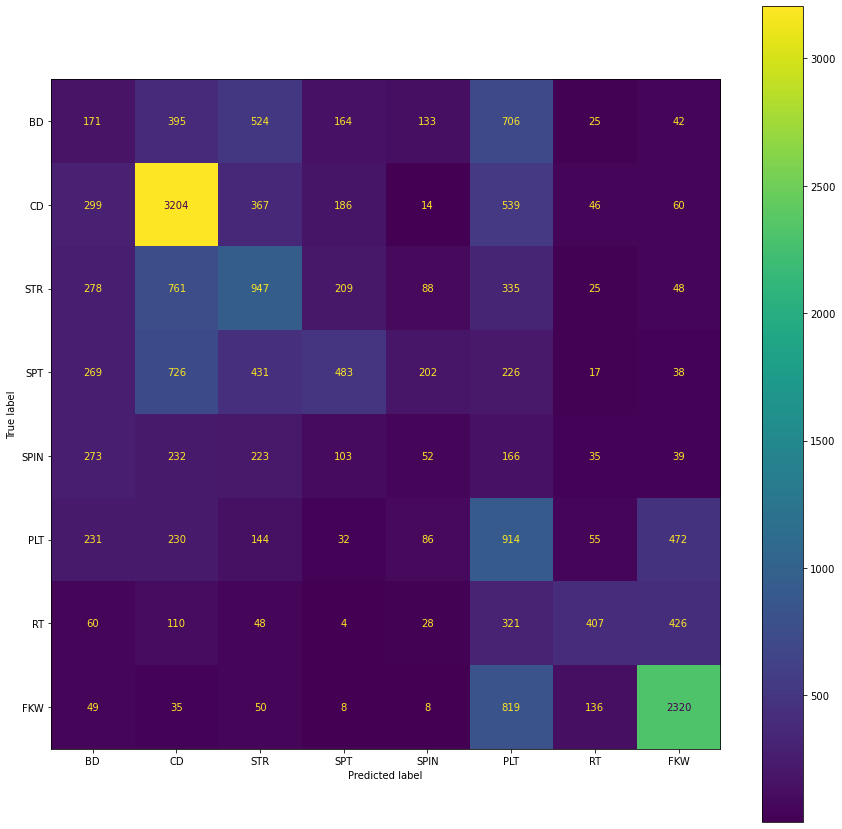

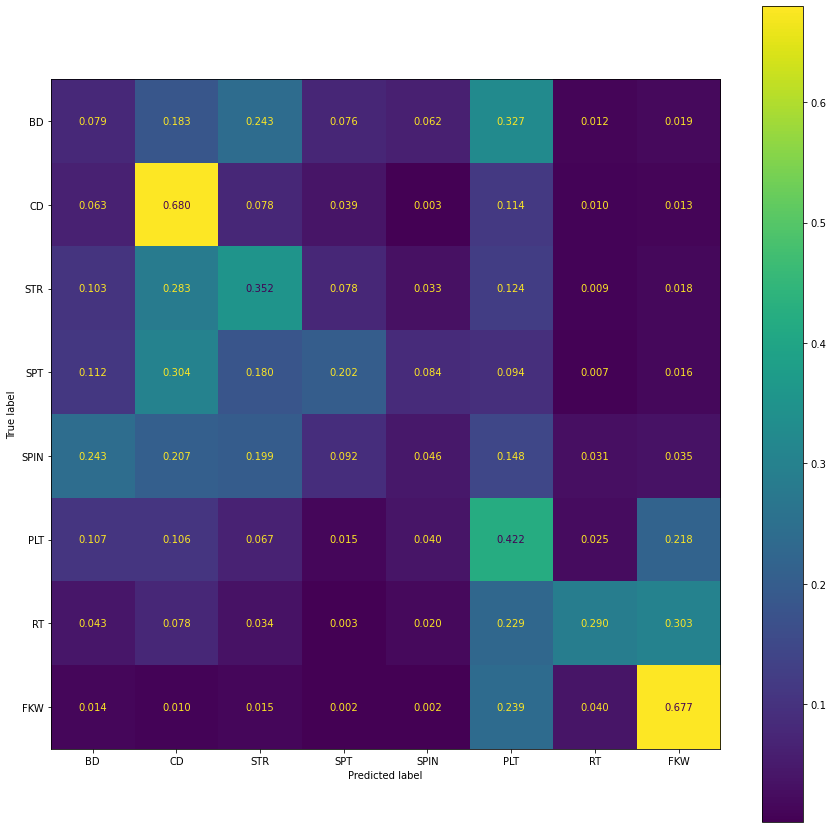

In [7]:
if split_type == 'deployment':
    # deployment: e.g. STAR2006_test_results.npz
    fold_list = ['STAR2000', 'STAR2003', 'STAR2006', 'HICEAS2002', 'PICEAS2005']

    # for ii in range(len(fold_list)):
    label_test_all  = []
    label_pred_all = []
    for ee in fold_list:
        label_temp = np.load(os.path.join(result_path, target_split_folder, ee+'_test_results.npz'))
        label_test_all.append(label_temp['label_test'])
        label_pred_all.append(label_temp['label_pred'])
    label_pred_all = np.concatenate(label_pred_all)
    label_test_all = np.concatenate(label_test_all)

    print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None2, output_dict=False, zero_division='warn')
    np.set_printoptions(linewidth=200, precision=3, suppress=True)
    
    print("Confusion matrix:")
    # cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
    cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

    cm2 = cm*1.0
    for ii in range(cm.shape[0]):
        cm_row = cm[ii, :]*1.0

        cm_row_sum = cm_row.sum()
        if cm_row_sum != 0:
            cm2[ii, :] = cm_row / cm_row_sum
        else:
            cm2[ii, :] = np.zeros(cm.shape[1])
    
    print(species_list)
    print('')
    print(cm)
    print('')
    print(cm2)

    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)
    
    fig, ax = plt.subplots(figsize=[15, 15])
    disp.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format=None, colorbar=True)
    
    fig, ax = plt.subplots(figsize=[15, 15])
    disp2.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format='.3f', colorbar=True)


In [10]:
report = classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3) #)  #, target_names=None, sample_weight=None2, output_dict=False, zero_division='warn')

# Enounter split

In [8]:
if split_type == 'encounter':
    # enounter: e.g. fold0_test_results.npz, 
    fold_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']
    # result_encounter = np.load(os.path.join(result_path, '20210520_104352_encounter'))

    # for ii in range(len(fold_list)):
    label_test_all  = []
    label_pred_all = []
    for ee in fold_list:
        label_temp = np.load(os.path.join(result_path, target_split_folder, ee+'_test_results.npz'))
        label_test_all.append(label_temp['label_test'])
        label_pred_all.append(label_temp['label_pred'])
    label_pred_all = np.concatenate(label_pred_all)
    label_test_all = np.concatenate(label_test_all)

    print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')

    np.set_printoptions(linewidth=200, precision=3, suppress=True)

    print("Confusion matrix:")
    # cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
    cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

    cm2 = cm*1.0
    for ii in range(cm.shape[0]):
        cm_row = cm[ii, :]*1.0

        cm_row_sum = cm_row.sum()
        if cm_row_sum != 0:
            cm2[ii, :] = cm_row / cm_row_sum
        else:
            cm2[ii, :] = np.zeros(cm.shape[1])
            
    print(species_list)
    print('')
    print(cm)
    print('')
    print(cm2)

    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format=None, colorbar=True)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp2.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format='.3f', colorbar=True)

# Clip split

In [9]:
if split_type == 'clip':
    # clip: e.g. fold0_test_results.npz, 
    fold_list = ['fold0', 'fold1', 'fold2', 'fold3', 'fold4']

    # for ii in range(len(fold_list)):
    label_test_all  = []
    label_pred_all = []
    for ee in fold_list:
        label_temp = np.load(os.path.join(result_path, target_split_folder, ee+'_test_results.npz'))
        label_test_all.append(label_temp['label_test'])
        label_pred_all.append(label_temp['label_pred'])
    label_pred_all = np.concatenate(label_pred_all)
    label_test_all = np.concatenate(label_test_all)

    print(classification_report(label_test_all, np.argmax(label_pred_all, axis=1), target_names=species_list, digits=3)) #)  #, target_names=None, sample_weight=None, output_dict=False, zero_division='warn')

    np.set_printoptions(linewidth=200, precision=3, suppress=True)

    print("Confusion matrix:")
    # cm = confusion_matrix(label_train[:label_train_pred.shape[0]], np.argmax(label_train_pred, axis=1), labels=species_id)
    cm = confusion_matrix(label_test_all, np.argmax(label_pred_all, axis=1), labels=species_id)

    cm2 = cm*1.0
    for ii in range(cm.shape[0]):
        cm_row = cm[ii, :]*1.0

        cm_row_sum = cm_row.sum()
        if cm_row_sum != 0:
            cm2[ii, :] = cm_row / cm_row_sum
        else:
            cm2[ii, :] = np.zeros(cm.shape[1])
            
    print(species_list)
    print('')
    print(cm)
    print('')
    print(cm2)

    from sklearn.metrics import plot_confusion_matrix
    from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
    disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format=None, colorbar=True)

    fig, ax = plt.subplots(figsize=[15, 15])
    disp2.plot(include_values=True,
                         cmap='viridis', ax=ax, xticks_rotation='horizontal',
                         values_format='.3f', colorbar=True)

## Model architecture